In [ ]:
pip install gensim nltk matplotlib scikit-learn

In [ ]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA

# Download necessary data for tokenization
nltk.download('punkt_tab')

# Sample text corpus
sentences = [
    "I love playing football",
    "Football is a great sport",
    "I enjoy watching football matches",
    "The team won the match",
    "Playing football improves fitness",
    "Sports and fitness are important for health",
    "Good teams work together to win games",
    "Practice makes a player better at football"
]

# Tokenize sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train Word2Vec model using Skip-gram
model = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=3, min_count=1, sg=1)

# Get words and vectors from the trained model
words = list(model.wv.index_to_key)  # Get vocabulary words
word_vectors = np.array([model.wv[word] for word in words])  # Get corresponding word vectors


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary data for tokenization
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Sample text corpus
sentences = [
    "I love playing football",
    "Football is a great sport",
    "I enjoy watching football matches",
    "The team won the match",
    "Playing football improves fitness",
    "Sports and fitness are important for health",
    "Good teams work together to win games",
    "Practice makes a player better at football"
]

# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Tokenize, remove stopwords, and lemmatize
tokenized_sentences = [
    [lemmatizer.lemmatize(word, pos='v') for word in word_tokenize(sentence.lower()) if word not in stop_words]
    for sentence in sentences
]

# Train Word2Vec model using Skip-gram
model = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=3, min_count=1, sg=1)

# Get words and vectors from the trained model
words = list(model.wv.index_to_key)  # Get vocabulary words
word_vectors = np.array([model.wv[word] for word in words])  # Get corresponding word vectors


In [ ]:
print(tokenized_sentences)
# Get vector for the word "football"
vector_football = model.wv['football']
print(vector_football)  # Prints a 50-dimensional vector

[['love', 'play', 'football'], ['football', 'great', 'sport'], ['enjoy', 'watch', 'football', 'match'], ['team', 'match'], ['play', 'football', 'improve', 'fitness'], ['sport', 'fitness', 'important', 'health'], ['good', 'team', 'work', 'together', 'win', 'game'], ['practice', 'make', 'player', 'better', 'football']]
[-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.019996

In [ ]:
# Find similar words to "football"
similar_words = model.wv.most_similar("football")
print(similar_words)

[('game', 0.2705727517604828), ('good', 0.21057100594043732), ('better', 0.16704076528549194), ('health', 0.15020909905433655), ('great', 0.13204392790794373), ('play', 0.1267007291316986), ('watch', 0.09986160695552826), ('make', 0.07067328691482544), ('together', 0.059377871453762054), ('win', 0.04979120194911957)]


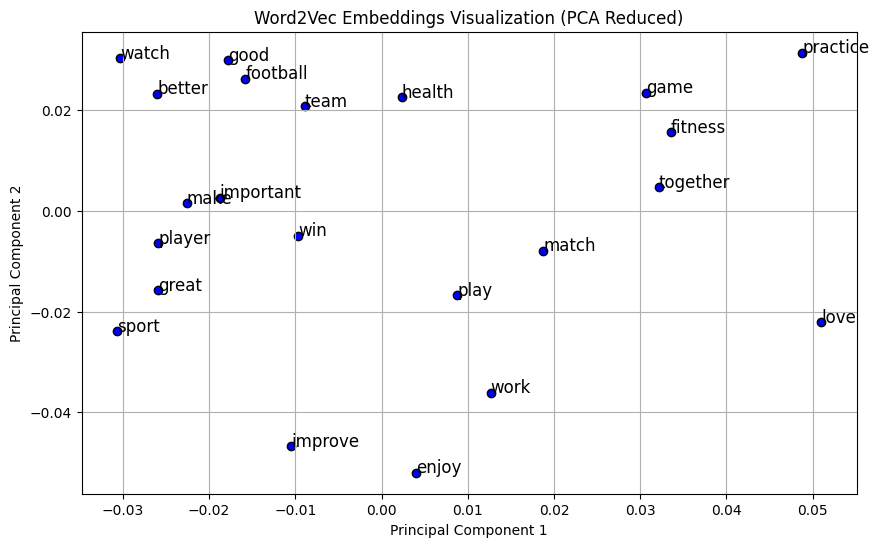

In [ ]:
# Reduce word vectors from 50D to 2D using PCA(Reduce no of dimensions per word)
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the words in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='blue')

# Annotate points with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

plt.title("Word2Vec Embeddings Visualization (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [ ]:
#the Original vs. Reduced Dimensions
print("Original Shape:", word_vectors.shape)  # (num_words, 50)
print("Reduced Shape:", word_vectors_2d.shape)  # (num_words, 2)

Original Shape: (22, 50)
Reduced Shape: (22, 2)


In [ ]:
#how much information PCA preserved
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by PC1:", explained_variance[0])
print("Explained Variance by PC2:", explained_variance[1])
print("Total Variance Retained:", sum(explained_variance))
#20.1% of the variance is retained, this means a lot of information is lost in the 2D projection.

Explained Variance by PC1: 0.102587804
Explained Variance by PC2: 0.09842564
Total Variance Retained: 0.201013445854187


In [ ]:
#Check How Many Components Retain 90% Variance
pca_full = PCA()
pca_full.fit(word_vectors)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Number of components needed to retain 90% variance: {num_components}")


Number of components needed to retain 90% variance: 15


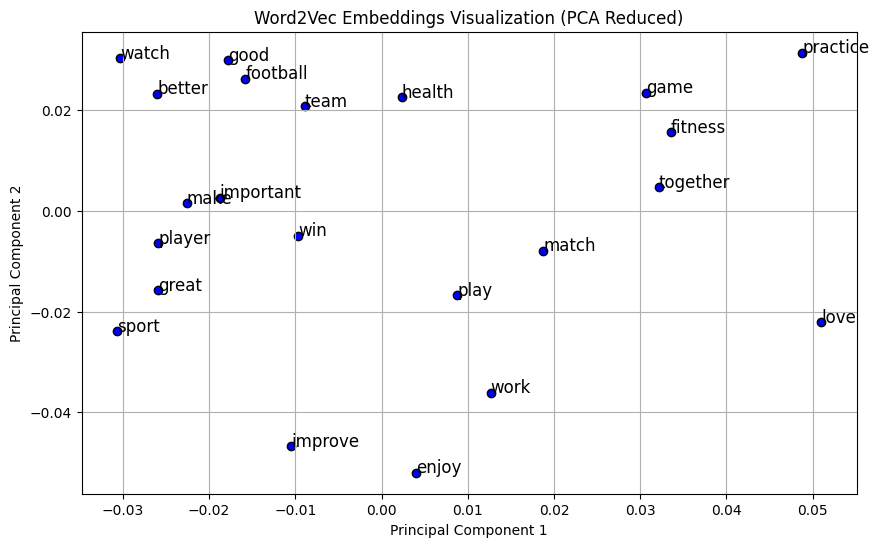

In [ ]:
# Reduce word vectors from 50D to 2D using PCA(Reduce no of dimensions per word)
pca = PCA(n_components=15)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the words in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='blue')

# Annotate points with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

plt.title("Word2Vec Embeddings Visualization (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [ ]:
#how much information PCA preserved
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by PC1:", explained_variance[0])
print("Explained Variance by PC2:", explained_variance[1])
print("Total Variance Retained:", sum(explained_variance))
#90% of the variance is retained

Explained Variance by PC1: 0.102587804
Explained Variance by PC2: 0.09842564
Total Variance Retained: 0.9062523730099201


In [ ]:
#Compute Average Word2Vec for a Sentence
def avg_word2vec(sentence, model):
    words = word_tokenize(sentence.lower())  # Tokenize sentence
    word_vectors = [model.wv[word] for word in words if word in model.wv]  # Get word vectors
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Return zero vector if no valid words found
    return np.mean(word_vectors, axis=0)  # Compute average

# Example sentence
sentence = "I love football"
vector = avg_word2vec(sentence, model)

print("Averaged Word2Vec Vector for Sentence:", vector)


Averaged Word2Vec Vector for Sentence: [-5.86233847e-03 -1.03911280e-03 -2.26176158e-03  1.09698409e-02
 -6.02975115e-03 -7.13994773e-03  1.01051433e-03  7.24690221e-03
  2.06948863e-03 -2.71128956e-05 -1.50054460e-03 -4.94702207e-03
 -2.18251115e-03  8.69207177e-03 -1.43241677e-02  2.75514834e-03
 -5.78041747e-03 -6.39519421e-03 -4.80210315e-03 -1.29197761e-02
  1.08762365e-02  1.39643531e-02  3.18337092e-03  1.00832907e-02
  8.06192867e-03  6.44240808e-03  4.75864206e-03 -3.38091003e-03
 -1.08493688e-02  2.59407144e-03 -1.90880289e-03  7.77547341e-03
  1.64642222e-02  7.19720963e-04 -1.21567771e-02  2.36108433e-03
  3.04736057e-03 -2.41850992e-03  6.10185042e-03 -3.61602288e-04
 -2.09119124e-03  6.50500879e-03 -1.00245271e-02  1.37657532e-03
 -5.67466766e-03 -2.57589825e-04  1.79534685e-03  4.13349317e-03
  8.79633706e-03  1.12012215e-03]
